# HomeWork 9

**DeadLine : 23:59 5 Azar 1399**

**Total points : 100 pts**

Import some prerequisites.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Run this cell for plotting.

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 2

Here is for your helper functions (optional).

Implement this function for Augmented reality.

In [5]:
def AR(background, image):
    '''
    Adds the input image to the background image properly.
    
    Parameters:
        background (numpy.ndarray) : background image
        image (numpy.ndarray): input image
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    out_img = background.copy()
    

    #Write your code here
    frameCorners = np.float32([[150,110], [230,110], [148,220], [230,222]])
    imageCorners = np.float32([[0,100], [1150,100], [40,1790], [1150,1780]])
    mat, mask = cv2.findHomography(imageCorners, frameCorners)
    imageTransformed = cv2.warpPerspective(image, mat, (background.shape[1], background.shape[0]))
    out_img[imageTransformed != 0] = imageTransformed[imageTransformed != 0]
    
    return out_img

Test your implementation (dont change this cell)

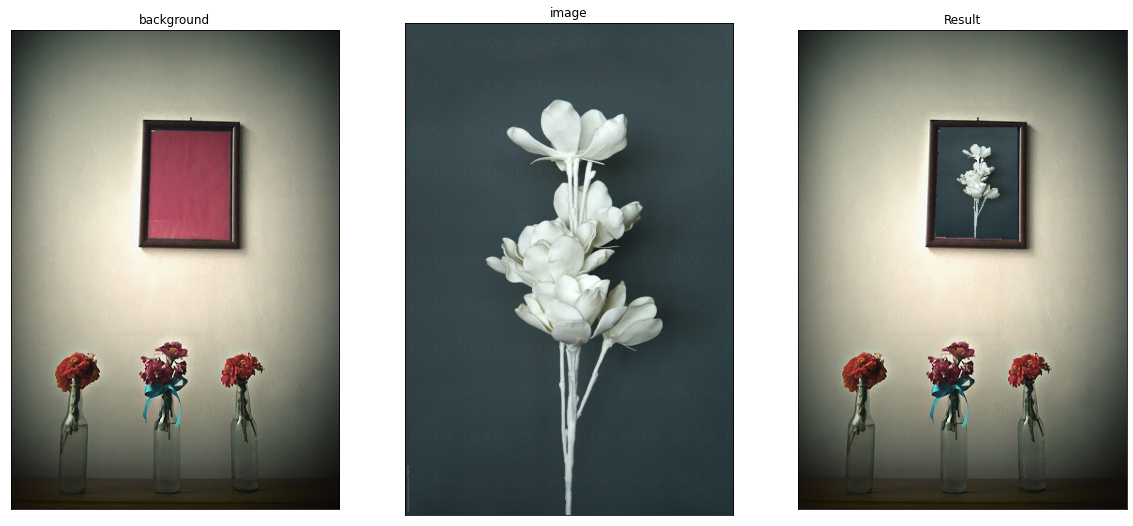

In [6]:
image_list = []

background = cv2.imread(os.path.join('images', 'background.jpg'))
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
image_list.append([background, 'background', 'img'])

image = cv2.imread(os.path.join('images', '1.jpg'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_list.append([image, 'image', 'img'])

image_list.append([AR(background, image), 'Result', 'img'])


plotter(image_list,1 , 3, True, 20, 10, '2')

# PART 3A

Here is for your helper functions (optional).

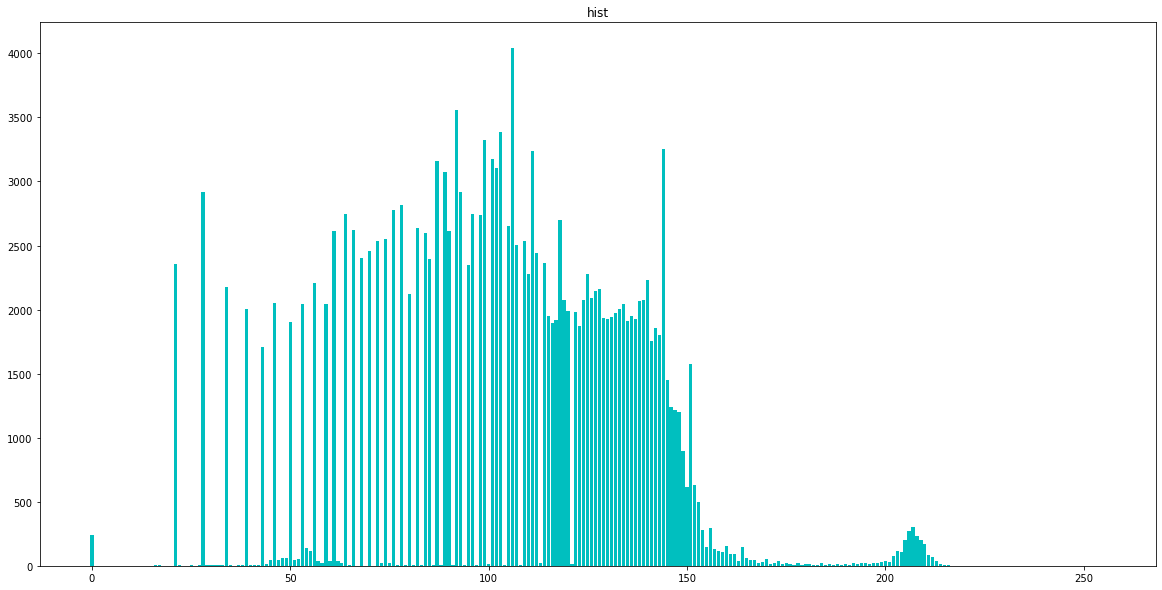

In [7]:
def show_histogram(histogram, title, fig_name):
    '''
    Plots histogram with it's caption and saves result image.

    Parameters:
        histogram (numpy.ndarray): The numpy array of numbers in histogram.
        title (str): The title of the plot.
        fig_name (str): The name of the image of the plot.
    '''
    
    plt.figure()
    plt.bar(np.arange(256),histogram,color = 'c')
    plt.title(title)
    plt.savefig(fig_name + '.png')
    plt.show()

def compute_histogram(image):
    '''
    Computes histogram of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The numpy array of numbers in histogram.   
    '''
    
    histogram = np.zeros((256), np.int)
    ####### your code ########
    el, histogram[el] = np.unique(image, return_counts=True)
    ##########################
    
    return histogram

image = cv2.imread(os.path.join('images', 'q2.png'), cv2.IMREAD_GRAYSCALE)
h = compute_histogram(image)
show_histogram(h, 'hist', '3A_hist')

Implement this function to get the global otsu algorithm output.

In [34]:
from statistics import mean

def global_otsu(image):
    '''
    Applys global otsu on the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result panorama image.
    '''
    
    out_img = image.copy()
    
    #Write your code here
    res1 = []
    res2 = []
    varianceTotal = []
    histogram = compute_histogram(image)
    meanHist = mean(histogram)
    sumHist = np.sum(histogram)
    for k in range(1, 255):
        w1 = np.sum(histogram[0:k]) / sumHist
        w2 = np.sum(histogram[k:]) / sumHist
        
        variance1 = np.var(histogram[0:k])
        variance2 = np.var(histogram[k:])
        
        varianceW = (w1 * variance1) + (w2 * variance2)
        varianceTotal.append(varianceW)
        
    k = np.argmin(varianceTotal)-1

    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            if out_img[i][j] > k:
                out_img[i][j] = 255
            else:
                out_img[i][j] = 0
                
    return out_img

Test your implementation (dont change this cell)

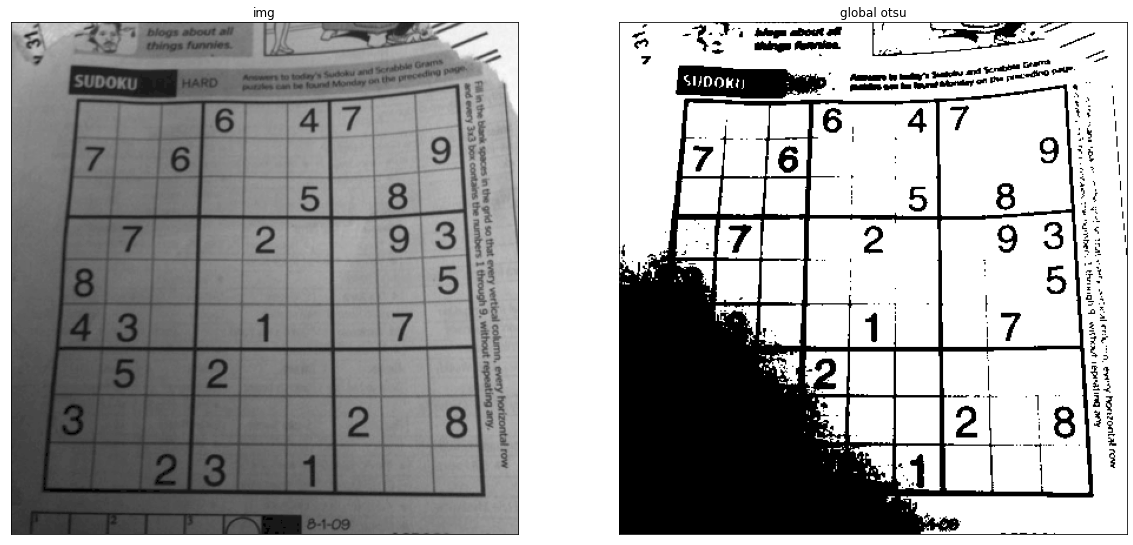

In [35]:
image_list = []

image = cv2.imread(os.path.join('images', 'q2.png'), cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'img', 'img'])

image_list.append([global_otsu(image), 'global otsu', 'img'])

plotter(image_list, 1, 2, True, 20, 10, '3A')

# PART 3B

Here is for your helper functions (optional).

Implement this function to get local otsu algorithm output.

In [41]:
def local_otsu(image):
    '''
    Applys local otsu on the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result panorama image.
    '''
    
    out_img = image.copy()
    
    #Write your code here    
    out_img[:218, :216] = global_otsu(out_img[:218, :216])
    out_img[218:, :216] = global_otsu(out_img[218:, :216])
    out_img[:218, 216:] = global_otsu(out_img[:218, 216:])
    out_img[218:, 216:] = global_otsu(out_img[218:, 216:])
    
    return out_img

Test your implementation (dont change this cell)

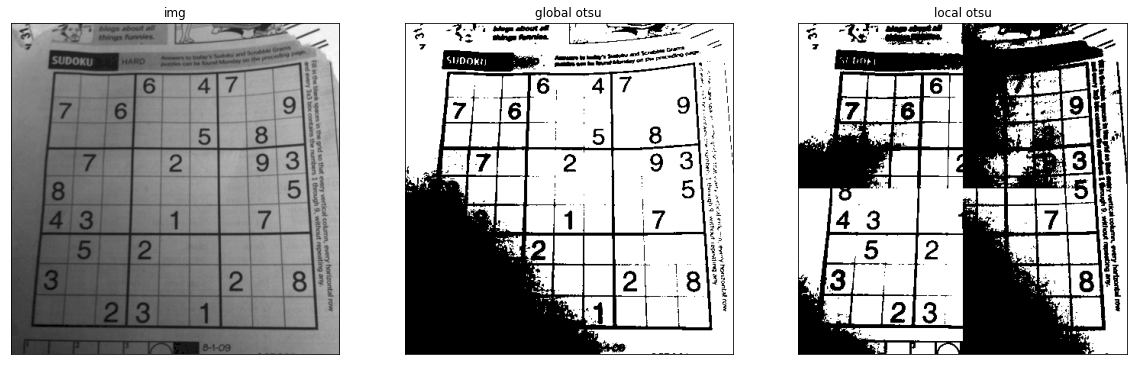

In [42]:
image_list = []

image = cv2.imread(os.path.join('images', 'q2.png'),cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'img', 'img'])


image_list.append([global_otsu(image), 'global otsu', 'img'])
image_list.append([local_otsu(image), 'local otsu', 'img'])

plotter(image_list, 1, 3, True, 20, 10, '3B')

# PART 3C

Here is for your helper functions (optional).

Implement this function to get the adaptive threshold algorithm output.

In [43]:
def adaptive_th(image):
    '''
    Applys adaptive threshold on the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result panorama image.
    '''
    
    out_img = image.copy()
    
    #Write your code here
    out_img = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    
    return out_img

Test your implementation (dont change this cell)

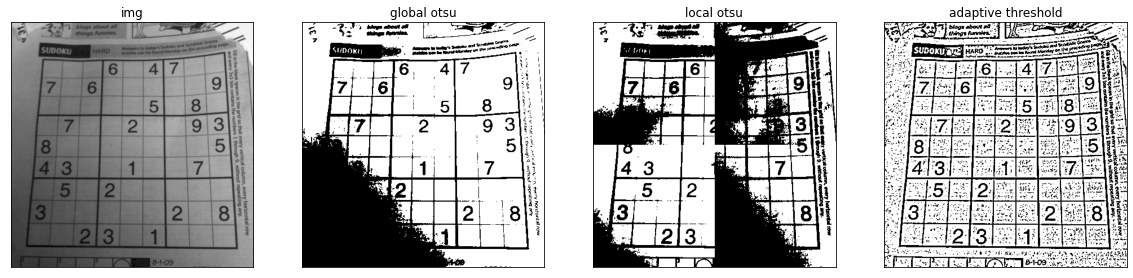

In [44]:
image_list = []

image = cv2.imread(os.path.join('images', 'q2.png'),cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'img', 'img'])


image_list.append([global_otsu(image), 'global otsu', 'img'])
image_list.append([local_otsu(image), 'local otsu', 'img'])
image_list.append([adaptive_th(image), 'adaptive threshold', 'img'])

plotter(image_list, 1, 4, True, 20, 10, '3C')

# PART 4

Here is for your helper functions (optional).

In [177]:
def harris(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    cornerPoints = cv2.cornerHarris(gray, 2, 3, 0.04)
    threshold = 0.04 * cornerPoints.max()
    x = np.where(cornerPoints > threshold)
    signPoints = np.array(list(zip(x[0], x[1])))
    
    return signPoints

Implement matching here.

In [178]:
import random
def find_match(image1, image2):
    '''
    Finds match points between two input images.
    
    Parameters:
        image1 (numpy.ndarray): input image.
        image2 (numpy.ndarray): second input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    result = None
    
    #Write your code here
    result = np.concatenate((image1, image2), axis=1)
    matchPoint1 = []
    matchPoint2 = []
    NCC = []
    signPoints1 = harris(image1)
    signPoints2 = harris(image2)
    matched = [False for i in range(signPoints2.shape[0])] 

    image1 = cv2.copyMakeBorder(image1, 2,2,2,2, cv2.BORDER_REFLECT_101)
    image2 = cv2.copyMakeBorder(image2, 2,2,2,2, cv2.BORDER_REFLECT_101)
    for point1 in signPoints1:
        for point2 in signPoints2:
            description1 = image1[point1[0] + 2:point1[0] + 5, point1[1] + 2:point1[1] + 5]
            description2 = image2[point2[0] + 2:point2[0] + 5, point2[1] + 2:point2[1] + 5]
            description1 = (description1 - np.mean(description1)) / (np.std(description1))
            description2 = (description2 - np.mean(description2)) / (np.std(description2))
            ncc = np.sum(np.multiply(description1, description2))
#             ncc = cv2.matchTemplate(description1, description2, cv2.TM_CCORR_NORMED)
            NCC.append(ncc)
        matchPoint1.append(point1)
        if matched[np.argmax(NCC)] == False and np.max(NCC) > 0.09:
            matchPoint2.append(signPoints2[np.argmax(NCC)])
            matched[np.argmax(NCC)] = True
        else:
            matchPoint2.append(None)
        NCC = []
    for i in range(0, len(signPoints1)):
        color = random.sample(range(1, 255), 3)
        if matchPoint2[i] is not None:
            cv2.line(result, (matchPoint1[i][1], matchPoint1[i][0]), (matchPoint2[i][1]+image1.shape[1], matchPoint2[i][0]), color, 2)
        
    return result

Test your implementation (dont change this cell)

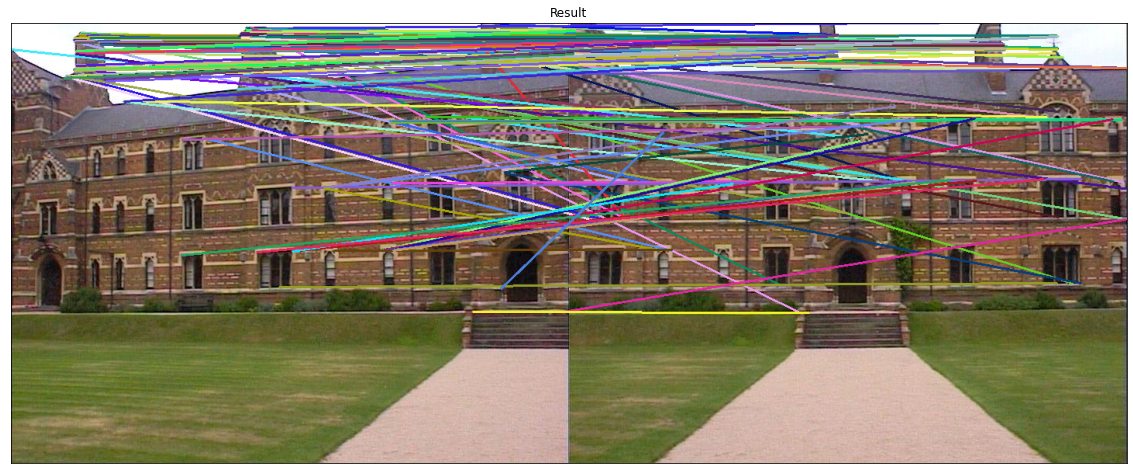

In [179]:
image_list = []

image1 = cv2.imread(os.path.join('images', 'building1.jpg'))
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)


image2 = cv2.imread(os.path.join('images', 'building2.jpg'))
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

image_list.append([find_match(image1,image2), 'Result', 'img'])

plotter(image_list,1 , 1, True, 20, 10, '4')

for create proper files for sending in quera run this cell.

In [180]:
!python notebook_converter.py

End!!!